In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'c:\Users\mat\Desktop\Data Mining\Final Project\df_downloadable.csv')
df

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources,Country,Continent
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6],United States,North America
1,1,500px,2020,14870304,social networking,hacked,[7],Canada,North America
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9],United States,North America
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10],United States,North America
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12],United States,North America
...,...,...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,[406][407],United States,North America
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408],United States,North America
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409],Slovakia,Europe
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411],Multiple Countries,Global


In [4]:
df.drop(columns=['Sources'])

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Country,Continent
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,United States,North America
1,1,500px,2020,14870304,social networking,hacked,Canada,North America
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,United States,North America
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,United States,North America
4,4,Adobe Inc.,2019,7500000,tech,poor security,United States,North America
...,...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,United States,North America
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,United States,North America
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,Slovakia,Europe
350,350,50 companies and government institutions,2022,6400000,various,poor security,Multiple Countries,Global


## Basic cleaning before visusalizations

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer default style
sns.set(style="whitegrid")

# Ensure numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Records'] = pd.to_numeric(df['Records'], errors='coerce')

# Drop rows with missing year
df_viz = df.dropna(subset=['Year']).copy()


## Breaches by Continent

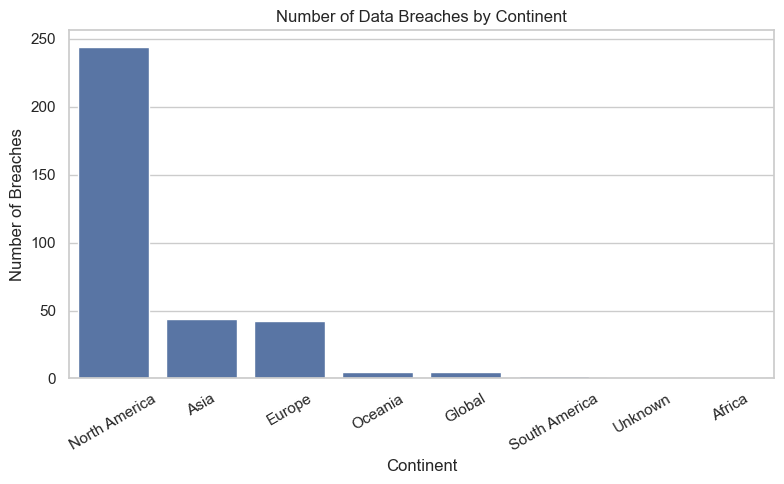

In [6]:
continent_counts = df_viz['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=continent_counts, x='Continent', y='Count')
plt.title('Number of Data Breaches by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Top 10 Countries by breach count

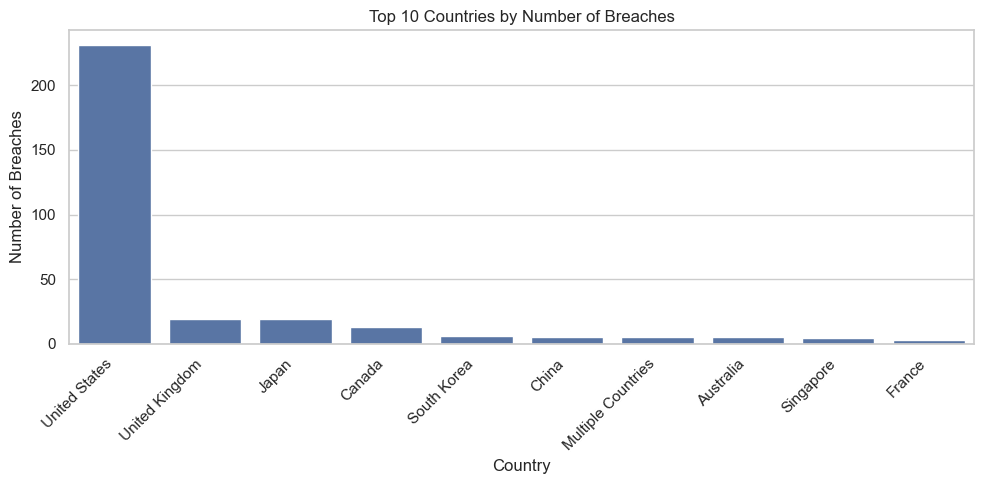

In [7]:
country_counts = (
    df_viz[df_viz['Country'].notna()]
    .groupby('Country')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='Count')
)

plt.figure(figsize=(10, 5))
sns.barplot(data=country_counts, x='Country', y='Count')
plt.title('Top 10 Countries by Number of Breaches')
plt.xlabel('Country')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Trend of breaches over time

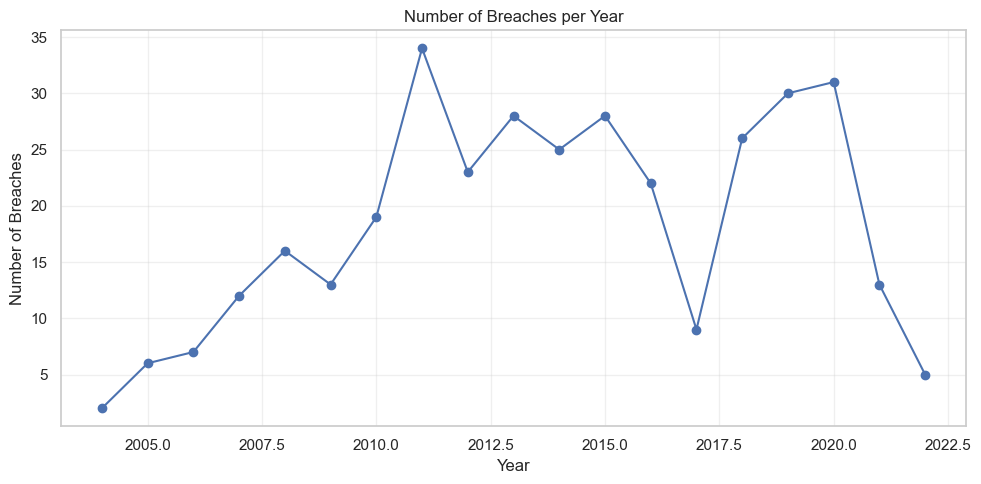

In [8]:
breaches_per_year = (
    df_viz.groupby('Year')
    .size()
    .reset_index(name='Count')
    .sort_values('Year')
)

plt.figure(figsize=(10, 5))
plt.plot(breaches_per_year['Year'], breaches_per_year['Count'], marker='o')
plt.title('Number of Breaches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Breaches per year by continent

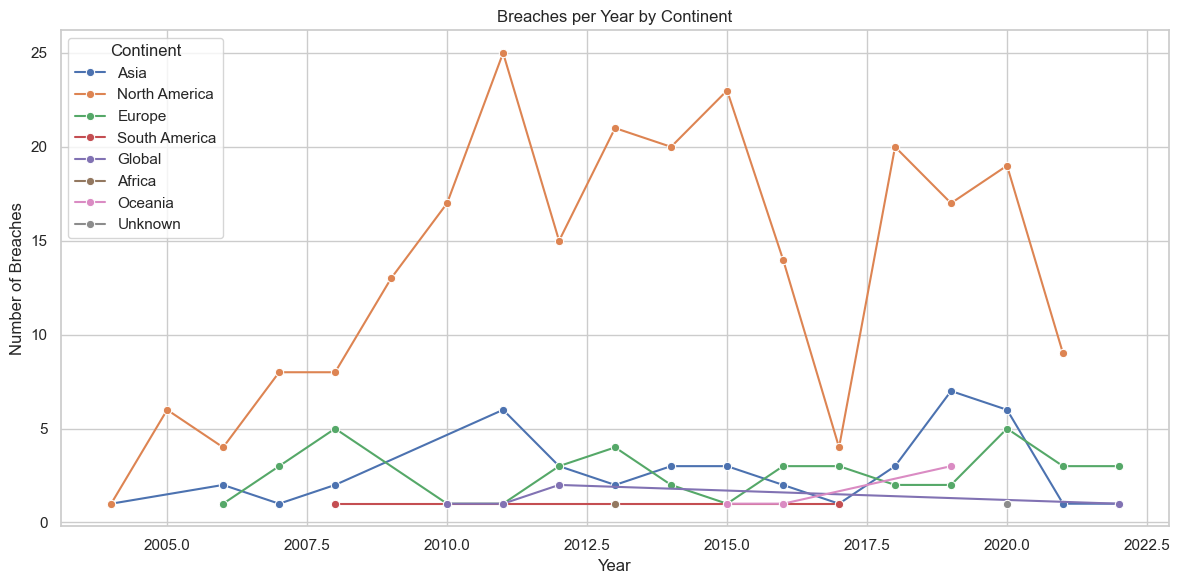

In [9]:
by_year_cont = (
    df_viz.groupby(['Year', 'Continent'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=by_year_cont, x='Year', y='Count', hue='Continent', marker='o')
plt.title('Breaches per Year by Continent')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.legend(title='Continent')
plt.tight_layout()
plt.show()


## Records exposed by Continent (log scale)

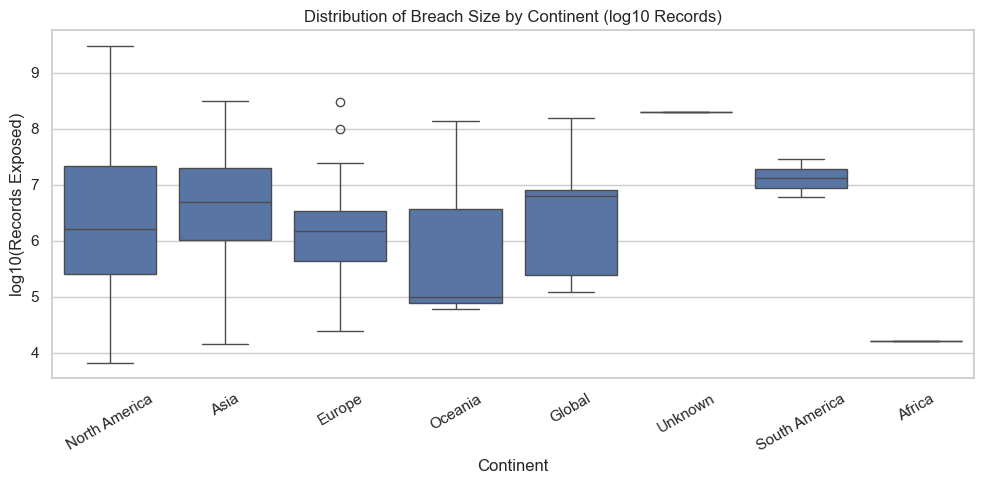

In [10]:
df_records = df_viz.dropna(subset=['Records', 'Continent']).copy()
df_records = df_records[df_records['Records'] > 0]  # no zeros/negative

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_records, x='Continent', y=np.log10(df_records['Records']))
plt.title('Distribution of Breach Size by Continent (log10 Records)')
plt.xlabel('Continent')
plt.ylabel('log10(Records Exposed)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Method vs Continent (heatmap of frequencies)

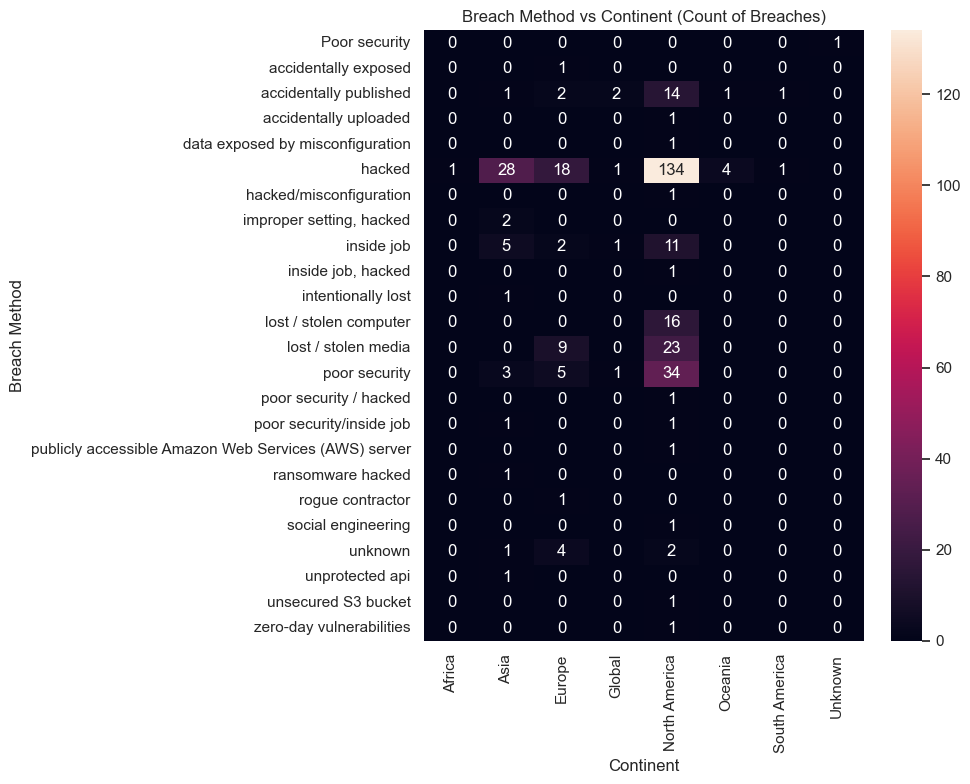

In [11]:
method_cont_table = (
    df_viz.pivot_table(
        index='Method',
        columns='Continent',
        values='Entity',
        aggfunc='count',
        fill_value=0
    )
)

plt.figure(figsize=(10, 8))
sns.heatmap(method_cont_table, annot=True, fmt='g')
plt.title('Breach Method vs Continent (Count of Breaches)')
plt.xlabel('Continent')
plt.ylabel('Breach Method')
plt.tight_layout()
plt.show()


## Organization type vs Records

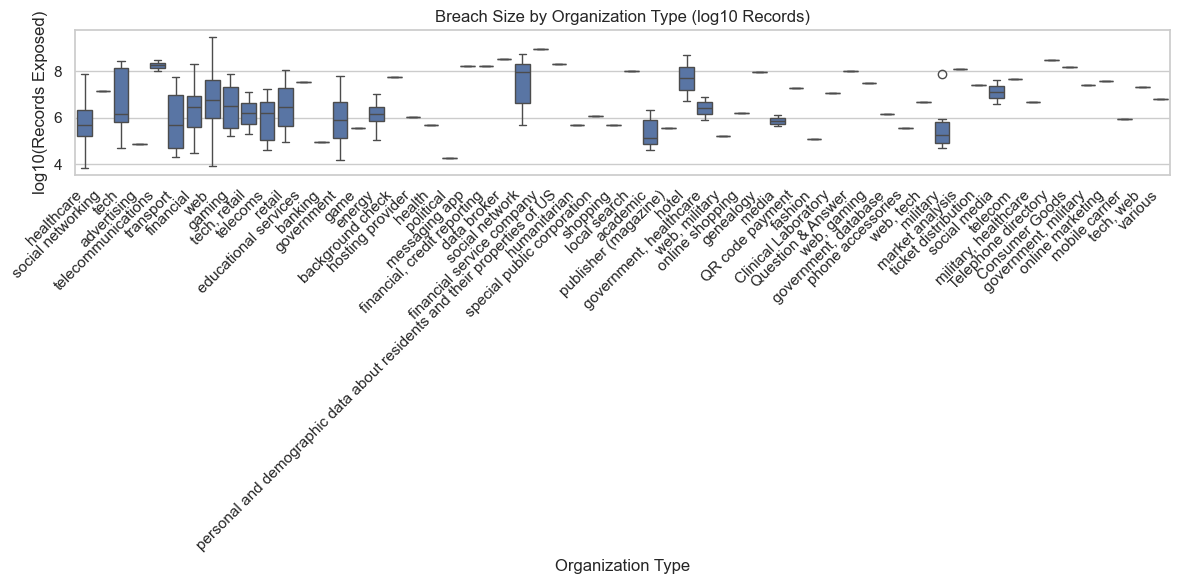

In [12]:
df_org = df_viz.dropna(subset=['Records', 'Organization type']).copy()
df_org = df_org[df_org['Records'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_org,
    x='Organization type',
    y=np.log10(df_org['Records'])
)
plt.title('Breach Size by Organization Type (log10 Records)')
plt.xlabel('Organization Type')
plt.ylabel('log10(Records Exposed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
